In [83]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np


The dataset (Jena Climate dataset) is downloaded from a cloud storage location.
It’s extracted from a ZIP file.
The extracted CSV file path is stored in csv_path.
The CSV file is then read into a Pandas DataFrame (df).

In [84]:
zip_path = tf.keras.utils.get_file(
    origin = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip",
    fname = "jena_climate_2009_2016.csv.zip",
    extract=True)

csv_path, _ = os.path.splitext(zip_path)

# csv_path now holds the path to the extracted .csv file, without the .zip extension
print(f"The extracted CSV file is located at: {csv_path}")


The extracted CSV file is located at: C:\Users\aljla\.keras\datasets\jena_climate_2009_2016_extracted


In [85]:
df = pd.read_csv(r"C:\Users\aljla\lstm_time_series_forecasting\data\jena_climate_2009_2016.csv")


In [86]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


### dataset info
420551 rows × 15 columns - this is a big dataset with observations taken every 10 minutes from 2009 and 2016
The line df = df[5::6] is a form of indexing used to sample the data. It means we are selecting every 6th row starting from index 5 (the 6th row, as indexing starts at 0). In the context of a time series dataset, this approach could be useful for downsampling data, especially if the observations are recorded every 10 minutes and we want to reduce the frequency of the data. 5 is the starting index (the 6th row). After running the code, the result will look like every hour. This reduces redundancy and keeps the dataset manageble.

Convert the "Date Time" column in the DataFrame df to datetime format and set it as the index of the DataFrame. This makes it easier to handle time-based operations, such as slicing and plotting.

We extracts only the temperature column for forecasting. When plotting temperature over time we can visualise trends and patterns.

In [87]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [88]:
df.index = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")
df[:24]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

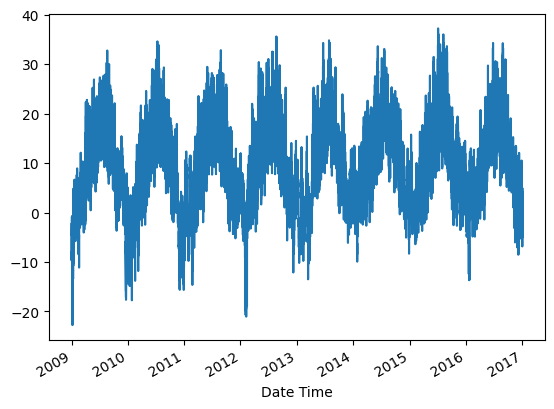

In [89]:
temp = df["T (degC)"]
temp.plot()

### creating function to input features for LSTM
LSTMs need sequential input data, so a sliding window transforms the time series into an input-output pair format.

We use the first five hours as input features (X) to predict the temperature at the sixth hour.
After predicting the sixth hour, we use the predicted value as part of the input for the next prediction (i.e., predicting the 7th hour using the first five known hours and the predicted 6th hour).

This is commonly known as recursive prediction or autoregressive forecasting, where each prediction builds upon the previous one.

In [90]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)


In [91]:
WIN_SIZE = 5
X, y = df_to_X_y(temp,WIN_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

### split dataset into training, testing and validation:
To split the dataset into training, testing, and validation sets, we can follow a common approach for time series data. Unlike regular machine learning tasks where data can be split randomly, for time series, we usually split the data chronologically, meaning the training data will come first, followed by validation, and finally testing.

Here's how to do that:

Training Data: The first portion of the dataset 60,000 samples.
Validation Data: This is used to fine-tune the model and to ensure it generalizes well, typically after the training, the next 50,000 samples.
Test Data: This is the final set that you use to evaluate the model performance, the remaining samples.

We want to avoid overfitting by using a separate validation set.

In [92]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

### Compile model and training on the train set

#### checkpoint
cp saves the best model (based on validation performance). It prevents loss of the best model if training deteriotes and it can be used to resume training later. It saves the best model based on val_loss (by default). Only updates the saved model if a better version appears. stores the best model in best_model.keras

#### model compilation
model compilation is the process of configuing the model before training
Uses Mean Squared Error MSE, as the loss function, this is suitable for regression tasks.
loss=MeanSquaredError()

Used in regression tasks (predicting continuous values).
Measures the difference between predictions and true values.
optimizer=Adam(learning_rate=0.0001) A low learning rate (0.0001) makes small, controlled weight updates to improve accuracy and smooth convergence.

Adam (Adaptive Moment Estimation) → An advanced optimizer that adjusts learning rates dynamically.

metrics=[RootMeanSquaredError()] tracks RMSE as an evaluation metric.

RMSE gives an interpretable measure of error in the same unit as the target variable.

#### fitting the model
Model training means fitting the model to the data by adjusting weights over multiple iterations (epochs).

1. X_train, y_train → The input data and labels for training for supervised learning.
2. validation_data=(X_val, y_val) → Used to evaluate how well the model generalizes (to prevent overfitting).
3. epochs=10 → The model will go through the dataset 10 times or iterations.
4. callbacks=[cp] → Saves the best model automatically during training.

During training the model processes batches of data. It updates weights using backpropagation and gradient descent (Adam optimiser). After each epoch, training loss, validation loss are calculated. If the the validation loss improves, the model is saved (cp).

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



In [94]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, "relu"))
model1.add(Dense(1, "linear"))

model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# define ModelCheckpoint
cp = ModelCheckpoint("model1/best_model.keras", save_best_only=True)

# compile the model
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [96]:
# train model with validation and callbacks
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 84.9252 - root_mean_squared_error: 9.0043 - val_loss: 1.0565 - val_root_mean_squared_error: 1.0279
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1389 - root_mean_squared_error: 1.4580 - val_loss: 0.6046 - val_root_mean_squared_error: 0.7775
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9273 - root_mean_squared_error: 0.9626 - val_loss: 0.5498 - val_root_mean_squared_error: 0.7415
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7373 - root_mean_squared_error: 0.8585 - val_loss: 0.5277 - val_root_mean_squared_error: 0.7265
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6800 - root_mean_squared_error: 0.8244 - val_loss: 0.4989 - val_root_mean_squared_error: 0.7063
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6669 - root_mean_squared_error: 0.8166 - val_loss: 0.4973 - val_root_mean_squared_error: 0.7052
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

#### Making predictions

Uses the trained model to predict temperature values for the training set. Flattens predictions into a 1D array and stored for comparison. This is repeated for validation and test sets and allows for comparison between predictions and actual temperature values. We plot them and analyse model performance on different datasets.



In [97]:
# load best model saved
from tensorflow.keras.models import load_model
model1 = load_model("model1/best_model.keras")

In [98]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={"Train Predictions":train_predictions, "Actuals": y_train})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 773us/step


,Train Predictions,Actuals
0,-9.855221,-9.67
1,-9.696034,-9.17
2,-8.910923,-8.10
3,-7.559268,-7.66
4,-7.400370,-7.04
...,...,...
59995,5.959195,6.07
59996,7.302943,9.88
59997,12.311697,13.53
59998,16.061783,15.43


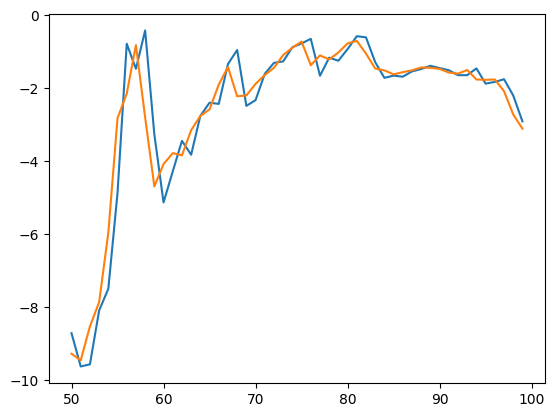

In [99]:
import matplotlib.pyplot as plt
plt.plot(train_results["Train Predictions"][50:100])
plt.plot(train_results["Actuals"][50:100])

In [100]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={"Val Predictions":val_predictions, "Actuals": y_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Val Predictions,Actuals
0,15.337355,14.02
1,13.122664,13.67
2,12.992695,12.27
3,11.475007,11.19
4,10.364561,10.85
...,...,...
4995,17.148186,18.27
4996,17.274855,17.85
4997,17.144009,16.65
4998,15.778087,15.85


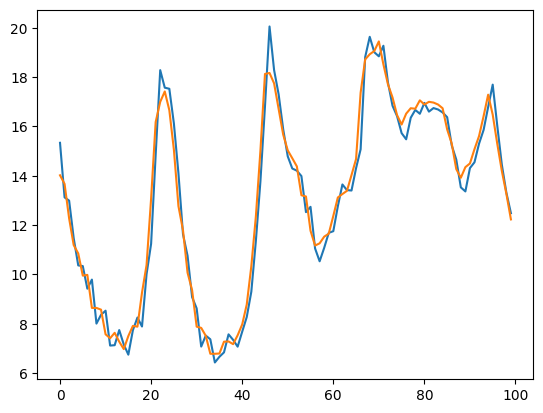

In [101]:
plt.plot(val_results["Val Predictions"][:100])
plt.plot(val_results["Actuals"][:100])

In [102]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={"Test Predictions":test_predictions, "Actuals": y_test})
test_results

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step


,Test Predictions,Actuals
0,14.353935,13.99
1,13.212919,13.46
2,12.825587,12.93
3,12.432362,12.43
4,11.991457,12.17
...,...,...
5081,-0.969576,-0.98
5082,-1.398392,-1.40
5083,-1.753625,-2.75
5084,-3.003468,-2.89


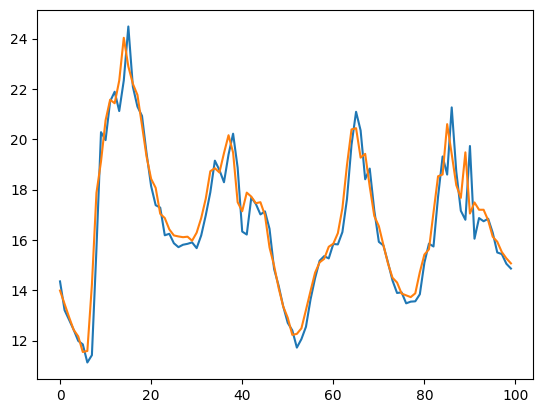

In [103]:
plt.plot(test_results["Test Predictions"][:100])
plt.plot(test_results["Actuals"][:100])